In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/insurance1/insurance.csv


In [2]:
df=pd.read_csv('/kaggle/input/insurance1/insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# EDA Part

In [4]:
df.shape

(1338, 7)

In [5]:
#check for null value
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
#check for duplicated
df.duplicated().sum()

1

In [7]:
#removing duplicated
df.drop_duplicates(inplace=True)

In [8]:
df.duplicated().sum()

0

In [9]:
#check for nan value
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [10]:
df['sex'].value_counts()

sex
male      675
female    662
Name: count, dtype: int64

In [11]:
df['smoker'].value_counts()

smoker
no     1063
yes     274
Name: count, dtype: int64

In [12]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    324
northeast    324
Name: count, dtype: int64

In [13]:
df['age'].skew() 

0.054780773126998195

# Visualization Part

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0.5, 1.0, 'NO.of children')

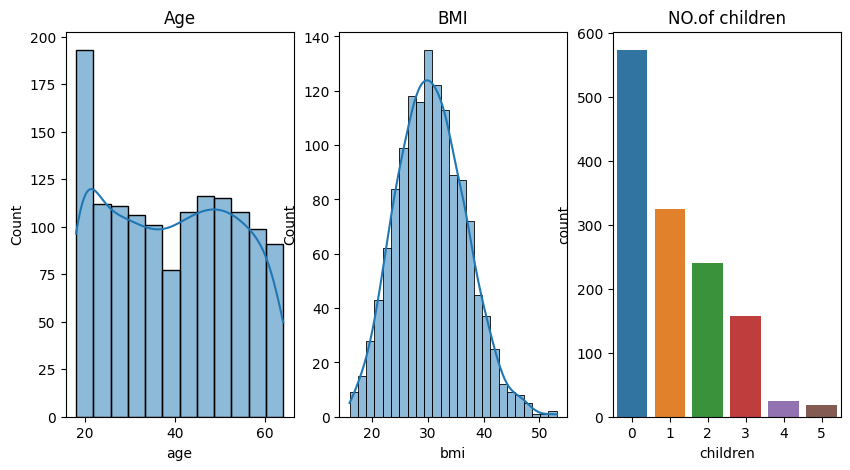

In [14]:
#check the skewness of data
plt.figure(num=3,figsize=(10,5))
plt.subplot(131)
sns.histplot(x=df['age'],data=df,kde=True)
plt.title('Age')
plt.subplot(132)
sns.histplot(x=df['bmi'],data=df,kde=True)
plt.title('BMI')
plt.subplot(133)
sns.countplot(x='children',data=df)
plt.title('NO.of children')

Text(0.5, 1.0, 'No.of children')

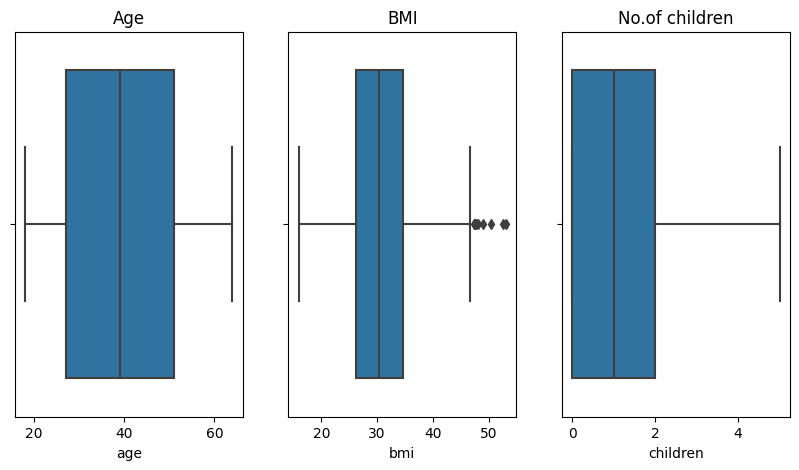

In [15]:
#check the outliers in the data 
plt.figure(num=3,figsize=(10,5))
plt.subplot(131)
sns.boxplot(x=df['age'],data=df)
plt.title('Age')
plt.subplot(132)
sns.boxplot(x=df['bmi'],data=df)
plt.title('BMI')
plt.subplot(133)
sns.boxplot(x=df['children'],data=df)
plt.title('No.of children')

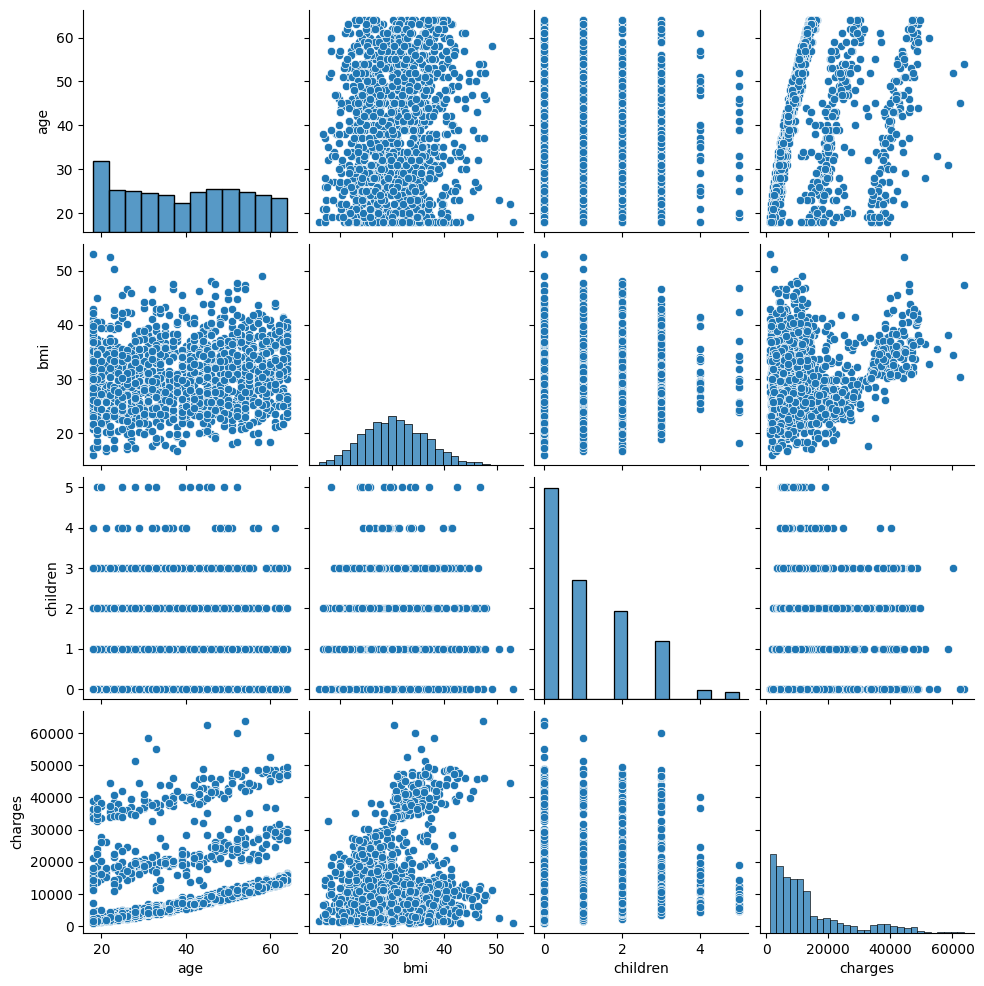

In [16]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
sns.pairplot(df)

# Feature_Scaling Part

In [17]:
df=pd.get_dummies(df,columns=['sex','smoker','region'],dtype=int)

In [18]:
df.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [19]:
#dependent variables
y=df['charges']
#independent variables
X=df.drop(columns=['charges'],axis=1)

In [20]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64

In [21]:
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [22]:
#train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=43)

In [23]:
X_train.shape,X_test.shape

((1002, 11), (335, 11))

In [24]:
#scaling the train and test data 
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [25]:
pd.DataFrame(X_train_scaled)

,0,1,2,3,4,5,6,7,8,9,10
0,0.782609,0.839432,0.4,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,0.391304,0.375205,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.000000,0.687602,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,0.217391,0.215319,0.4,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.652174,0.671901,0.4,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
997,0.260870,0.474331,0.2,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
998,0.739130,0.404697,0.2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
999,0.760870,0.188968,0.2,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1000,0.086957,0.227744,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


# Neural Network Training Part

In [26]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

2025-10-14 15:00:59.179838: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1760454059.410924      19 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1760454059.469263      19 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [27]:
model=Sequential()
model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(11,activation='relu'))
model.add(Dense(1))
#compile mode
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01),loss='mse',metrics=['mae'])
#add early stopping conditions
early_stopping=EarlyStopping(monitor='val_mae',patience=5,restore_best_weights=True)
#fit the modle
history=model.fit(X_train_scaled,y_train,epochs=100,validation_data=(X_test_scaled,y_test),callbacks=[early_stopping])

I0000 00:00:1760454071.164150      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1760454071.164952      19 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Epoch 1/100


I0000 00:00:1760454074.252173      65 service.cc:148] XLA service 0x7851c0004350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1760454074.252613      65 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1760454074.252636      65 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1760454074.510645      65 cuda_dnn.cc:529] Loaded cuDNN version 90300


23/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 344151712.0000 - mae: 13532.2285 

I0000 00:00:1760454075.185848      65 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 337292768.0000 - mae: 13442.9912 - val_loss: 331821792.0000 - val_mae: 13499.9287
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 326693760.0000 - mae: 13031.2959 - val_loss: 231087888.0000 - val_mae: 9882.4131
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 188317392.0000 - mae: 9200.3047 - val_loss: 125933608.0000 - val_mae: 8211.8457
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 128387840.0000 - mae: 8608.3047 - val_loss: 100732704.0000 - val_mae: 7510.3887
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 102479192.0000 - mae: 7929.4775 - val_loss: 73482872.0000 - val_mae: 6457.9424
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 73197272.0000 - mae: 6785.0225 - val_loss: 47315248.0000 - val_mae: 5238.9644
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 49230432.0000 - mae: 5425.1924 - val_loss: 40068096.0000 - val_mae: 4408.0034
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0

In [28]:
#model evaluation
loss,mae=model.evaluate(X_test_scaled,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23500676.0000 - mae: 2946.8145 


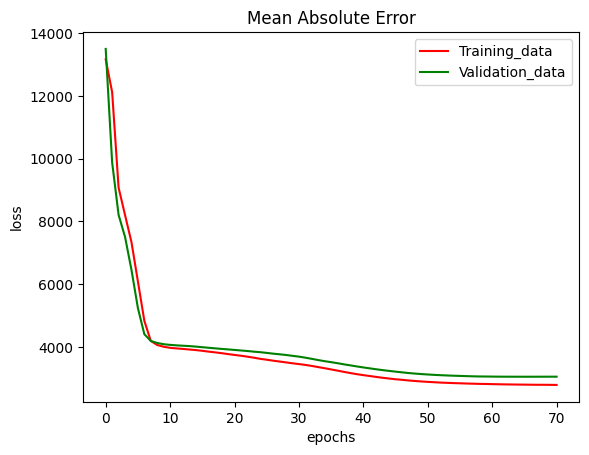

In [29]:
#visualization of loss 
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],color='red')
plt.plot(history.history['val_mae'],color='green')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()

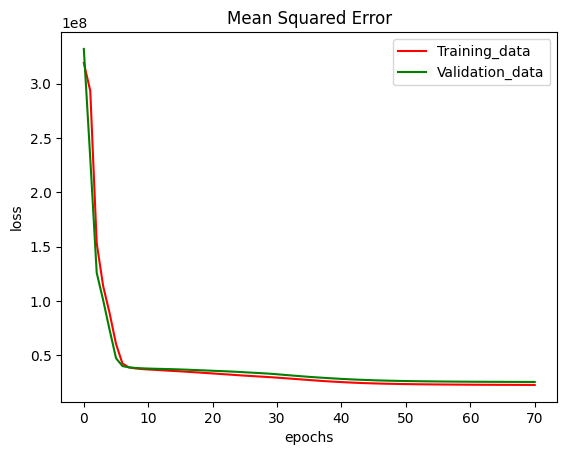

In [30]:
plt.plot(history.history['loss'],color='red')
plt.plot(history.history['val_loss'],color='green')
plt.title('Mean Squared Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()

In [31]:
#model prediction 
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import r2_score
print('r2 score is ',r2_score(y_test,y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
r2 score is  0.829193917471164


# HyperParameter Tuning Of NetralNetwork

In [32]:
import kerastuner as kt
tf.random.set_seed(42)
def build_model(hp):
    model1=Sequential()
    model1.add(Dense(11,activation='relu',input_dim=11))
    model1.add(Dense(11,activation='relu',))

    model1.add(Dense(1))
    optimizer=hp.Choice('optimizer',values=['adam','SGD','rmsprop','adagrad','adadelta'])
    model1.compile(optimizer=optimizer,loss='mse',metrics=['mae'])
    return model1
                

In [33]:
tuner=kt.RandomSearch(build_model,objective='val_mae',max_trials=5,directory='my_tuner_dir1001',
    project_name='my_project1001')

In [34]:
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 04s]
val_mae: 13572.1806640625

Best val_mae So Far: 8619.595703125
Total elapsed time: 00h 00m 22s


In [35]:
tuner.get_best_hyperparameters()[0].values

{'optimizer': 'SGD'}

In [36]:
model1=tuner.get_best_models(num_models=1)[0]

In [37]:
model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 11)             │           132 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            12 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
#!rm -rf my_tuner_dir


In [39]:
history1=model1.fit(X_train_scaled,y_train,epochs=100,initial_epoch=11,validation_data=(X_test_scaled,y_test))

Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 171175024.0000 - mae: 8735.5723 - val_loss: 156081264.0000 - val_mae: 8625.7725
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161114640.0000 - mae: 8957.9844 - val_loss: 151934288.0000 - val_mae: 8797.7910
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158135520.0000 - mae: 9184.2344 - val_loss: 150595712.0000 - val_mae: 8924.5117
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157203680.0000 - mae: 9321.5996 - val_loss: 150123312.0000 - val_mae: 8998.9258
Epoch 16/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156888096.0000 - mae: 9402.2109 - val_loss: 149938656.0000 - val_mae: 9040.1836
Epoch 17/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156770128.0000 - mae: 9445.8809 - val_loss: 149859136.0000 - val_mae: 9063.7158
Epoch 18/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156721344.0000 - mae: 9469.6816 - val_loss: 149822208.0000 - val_mae: 9076.1748
Epoch 19/100
32/32 

In [40]:
loss1,mae1=model1.evaluate(X_test_scaled,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 130261496.0000 - mae: 8642.6523


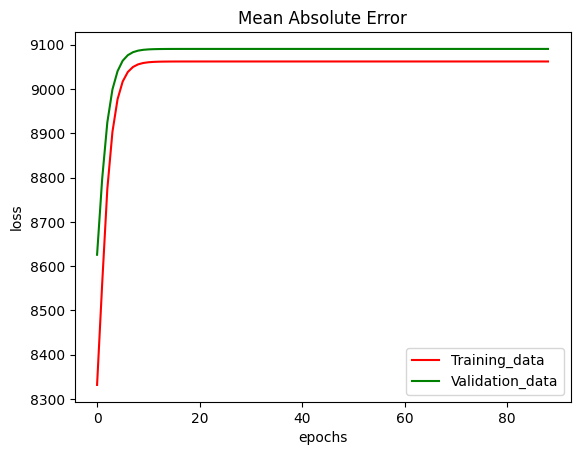

In [41]:
#visualization of loss 
import matplotlib.pyplot as plt
plt.plot(history1.history['mae'],color='red')
plt.plot(history1.history['val_mae'],color='green')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()

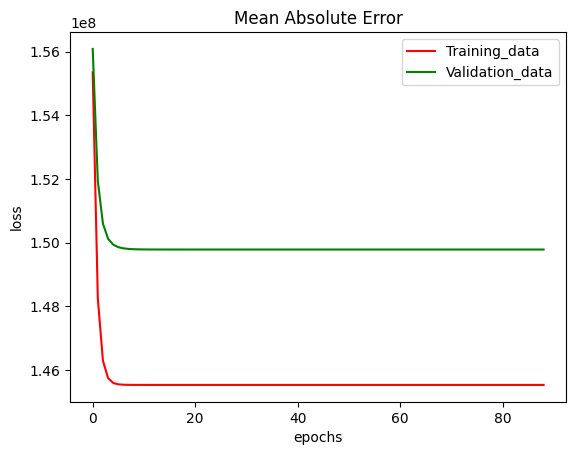

In [42]:
#visualization of loss 
import matplotlib.pyplot as plt
plt.plot(history1.history['loss'],color='red')
plt.plot(history1.history['val_loss'],color='green')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()

In [43]:
#for best neurons
def model_build(hp):
    model=Sequential()
    units=hp.Int('units',min_value=11,max_value=121,step=11)
    model.add(Dense(units=units,activation='relu',input_dim=11))
    model.add(Dense(1))
    model.compile(optimizer='SGD',loss='mse',metrics=['mae'])
    return model
    


In [44]:
tuner=kt.RandomSearch(model_build,objective='mae',max_trials=5,directory='my_tuner_dir_neuron10001',project_name='neuron0001')

In [45]:
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 04s]
mae: 8291.751953125

Best mae So Far: 8291.751953125
Total elapsed time: 00h 00m 18s


In [46]:
tuner.get_best_hyperparameters()[0].values

{'units': 110}

In [47]:
model=tuner.get_best_models(num_models=1)[0]

In [48]:
history=model.fit(X_train_scaled,y_train,epochs=100,initial_epoch=11,validation_data=(X_test_scaled,y_test))

Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - loss: 163265888.0000 - mae: 8869.1641 - val_loss: 152848336.0000 - val_mae: 8740.5000
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158784816.0000 - mae: 9117.7539 - val_loss: 150900688.0000 - val_mae: 8887.6182
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157412736.0000 - mae: 9281.9346 - val_loss: 150235360.0000 - val_mae: 8978.7988
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156961632.0000 - mae: 9379.9551 - val_loss: 149984256.0000 - val_mae: 9028.4268
Epoch 16/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156798768.0000 - mae: 9433.9248 - val_loss: 149879456.0000 - val_mae: 9057.3252
Epoch 17/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156733616.0000 - mae: 9463.2461 - val_loss: 149831856.0000 - val_mae: 9072.7686
Epoch 18/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156705040.0000 - mae: 9478.7949 - val_loss: 149808960.0000 - val_mae: 9081.0586
Epoch 19/100
32/32 

In [49]:
loss,mae=model.evaluate(X_test_scaled,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130261496.0000 - mae: 8642.6523


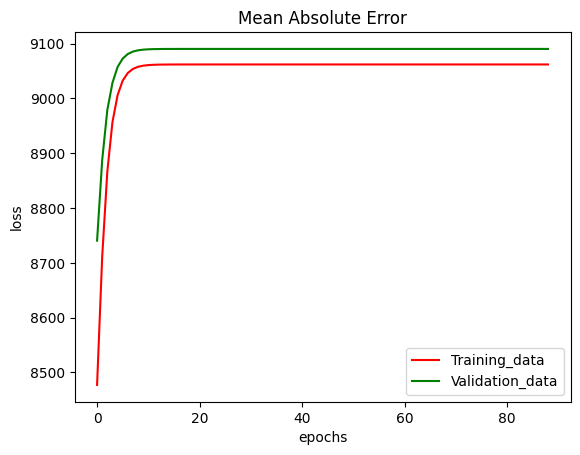

In [50]:
#visualization of loss 
import matplotlib.pyplot as plt
plt.plot(history.history['mae'],color='red')
plt.plot(history.history['val_mae'],color='green')
plt.title('Mean Absolute Error')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Training_data','Validation_data'])
plt.show()

In [51]:
#model prediction 
y_pred=model.predict(X_test_scaled)
from sklearn.metrics import r2_score
print('r2 score is ',r2_score(y_test,y_pred))

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
r2 score is  -0.0010328429887354051


In [52]:
#for layers
tf.random.set_seed(43)
def build_model(hp):
    model=Sequential()
    model.add(Dense(88,activation='relu',input_dim=11))
    for i in range(hp.Int('layers',min_value=1,max_value=10)):
        model.add(Dense(88,activation='relu'))
    model.add(Dense(1))
    model.compile(optimizer='SGD',loss='mse',metrics=['mae'])
    return model

In [53]:
tuner=kt.RandomSearch(build_model,objective='mae',max_trials=5,max_consecutive_failed_trials=10,
directory='my_tuner_dir_layers_01',project_name='layers_no_1')

In [54]:
tuner.search(X_train_scaled,y_train,epochs=10,validation_data=(X_test_scaled,y_test))

Trial 5 Complete [00h 00m 05s]
mae: nan

Best mae So Far: 8443.5556640625
Total elapsed time: 00h 00m 22s


In [55]:
tuner.get_best_hyperparameters()[0].values

{'layers': 1}

In [56]:
model=tuner.get_best_models(num_models=1)[0]

In [57]:
history=model.fit(X_train_scaled,y_train,epochs=100,initial_epoch=11,validation_data=(X_test_scaled,y_test))

Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - loss: 171975472.0000 - mae: 8869.3711 - val_loss: 155612192.0000 - val_mae: 8635.9668
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 161735392.0000 - mae: 8957.2002 - val_loss: 151848496.0000 - val_mae: 8803.8369
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158377568.0000 - mae: 9106.4561 - val_loss: 150607152.0000 - val_mae: 8923.0000
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 157169232.0000 - mae: 9218.4756 - val_loss: 150157296.0000 - val_mae: 8992.5986
Epoch 16/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156687360.0000 - mae: 9287.8184 - val_loss: 149976624.0000 - val_mae: 9030.3213
Epoch 17/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 156476400.0000 - mae: 9325.5830 - val_loss: 149897072.0000 - val_mae: 9051.9785
Epoch 18/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 156377264.0000 - mae: 9345.8477 - val_loss: 149859552.0000 - val_mae: 9063.5840
Epoch 19/100
32/32 

In [58]:
loss,mae=model.evaluate(X_test_scaled,y_test)

11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 130209232.0000 - mae: 8626.5449
